In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
# 640 * 360
IMG_WIDTH = 224
IMG_HIGH = 224
BATCH_SIZE = 16
NUM_CLASS = 2

datadir1 = "/content/drive/MyDrive/project/dataset.zip (Unzipped Files)/dataset/train"
data_train = pathlib.Path(datadir1)
datadir2 = "/content/drive/MyDrive/project/dataset.zip (Unzipped Files)/dataset/valid"
data_valid = pathlib.Path(datadir2)

train_datagen = ImageDataGenerator(
        rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

ds_train = train_datagen.flow_from_directory(
        data_train,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=True,
        seed=123)
ds_val = validation_datagen.flow_from_directory(
        data_valid,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=True,
        seed=123)

# img_augmentation = Sequential(
#     [
# #         preprocessing.Resizing(224,224),
#         preprocessing.RandomRotation(factor=0.15),
#         preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
#         preprocessing.RandomFlip(),
#         preprocessing.RandomContrast(factor=0.1),
# #         preprocessing.Rescaling(1./255)
#     ],
#     name="img_augmentation",
# )

Found 3283 images belonging to 2 classes.
Found 1021 images belonging to 2 classes.


In [ ]:
def build_model(NUM_CLASSES):
    inputs = layers.Input(shape=(IMG_WIDTH, IMG_HIGH, 3))
    # x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs) 
    
    model = tf.keras.applications.MobileNetV2(#input_shape=(IMG_WIDTH, IMG_HIGH, 3),
                                                include_top=False,
                                                weights='imagenet')
    model.trainable = True
    
    x = model(inputs)
    
    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    x = layers.Dense(NUM_CLASSES, activation=None, name="pred")(x)
    outputs = layers.Activation("softmax")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="MobileNetV2")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model(NUM_CLASS)
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "MobileNetV2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 1280)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_________________________________________________________________
top_dropout (Dropout)        (None, 1280)              0         
_________________________________________________________________
pred (Dense)                 (None, 2)                 2562      
__________________________________________________________

In [ ]:
model.layers[-2].activation

<function tensorflow.python.keras.activations.linear>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
205/205 [==============================] - 1438s 7s/step - loss: 0.2835 - accuracy: 0.8936 - val_loss: 0.5426 - val_accuracy: 0.8700
Epoch 2/100
205/205 [==============================] - 73s 356ms/step - loss: 0.0541 - accuracy: 0.9816 - val_loss: 0.2458 - val_accuracy: 0.9246
Epoch 3/100
205/205 [==============================] - 73s 357ms/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.4215 - val_accuracy: 0.9018
Epoch 4/100
205/205 [==============================] - 73s 356ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.2787 - val_accuracy: 0.9365
Epoch 5/100
205/205 [==============================] - 73s 357ms/step - loss: 0.0218 - accuracy: 0.9905 - val_loss: 0.4646 - val_accuracy: 0.8938
Epoch 6/100
205/205 [==============================] - 73s 355ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0920 - val_accuracy: 0.9821
Epoch 7/100
205/205 [==============================] - 73s 357ms/step - loss: 0.0125 - accuracy: 0.9952 - val_loss: 0.1549 - 

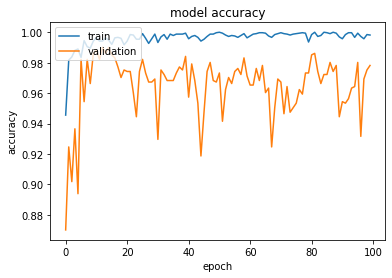

In [ ]:
epoch = 100
STEP_SIZE_TRAIN=ds_train.n//ds_train.batch_size
STEP_SIZE_VALID=ds_val.n//ds_val.batch_size
hist = model.fit_generator(generator=ds_train,steps_per_epoch=STEP_SIZE_TRAIN,  
                           validation_data=ds_val, validation_steps=STEP_SIZE_VALID,
                           epochs=epoch)
plot_hist(hist)

In [ ]:
model.save("/content/drive/MyDrive/project/model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/project/model/assets
